In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
%%bash
pip install tqdm
pip install --upgrade torch
pip install numpy
pip install matplotlib

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.6.0)


You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import os

import torch
import torchvision

from data_utils import cifar10, cifar10_classes, matplotlib_imshow, plot_history
from train_utils import train, device, evaluate
from models.mlp import MLP

In [3]:
HPS = dict(
    batch_size=128,
    epochs=50,
)

model_dir = './models/cifar10_basic'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

In [4]:
train_ds, test_ds = cifar10(batch_size=HPS['batch_size'])

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


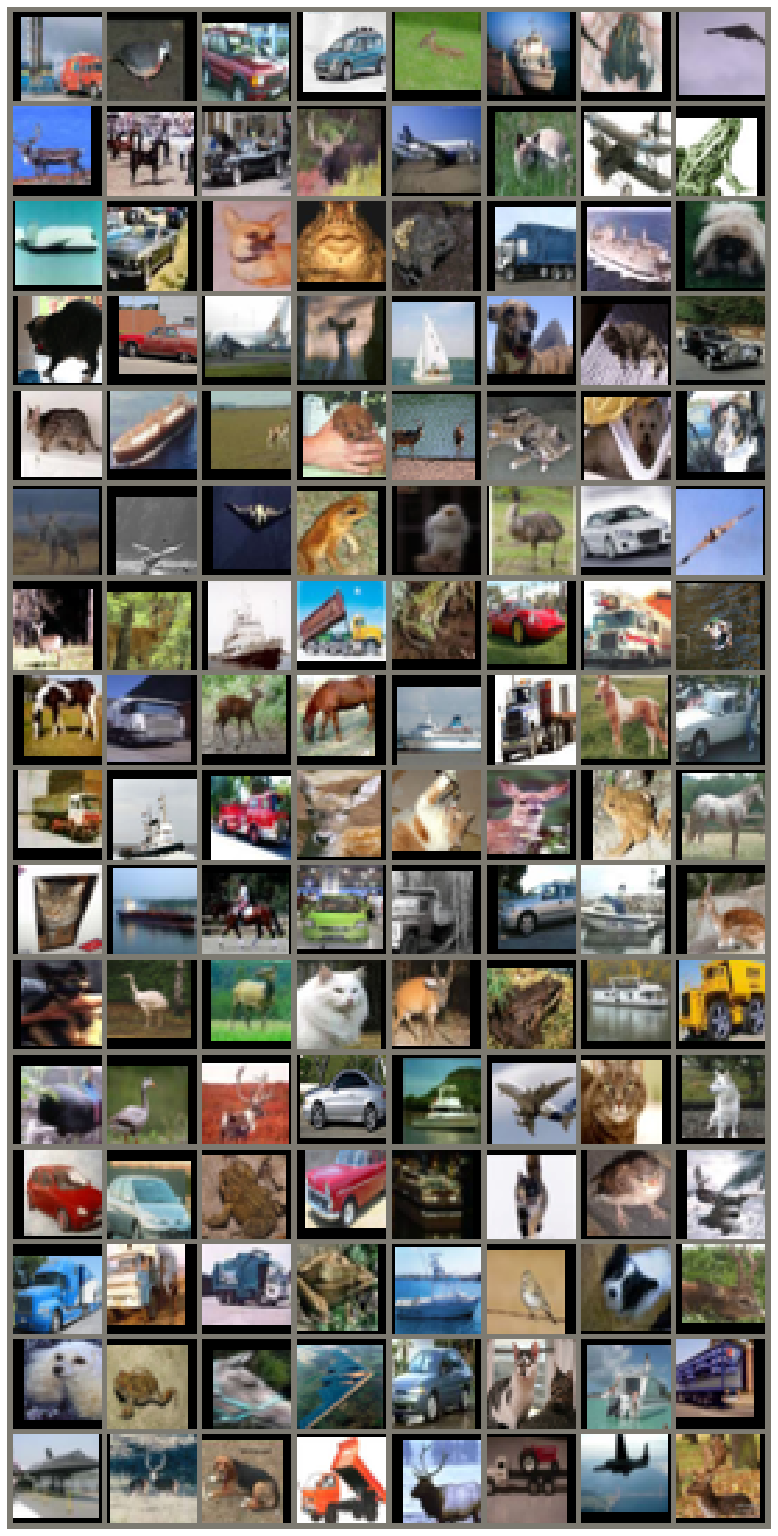

In [5]:
dataiter = iter(train_ds)
images, labels = dataiter.next()

# create grid of images
img_grid = torchvision.utils.make_grid(images)

# show images
matplotlib_imshow(img_grid)

In [6]:
model = torchvision.models.resnet18(num_classes=10)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[25, 40], gamma=0.1)
history = train(train_ds, test_ds, optimizer, model, scheduler=scheduler, epochs=HPS['epochs'])
torch.save({
    'model_state_dict': model.state_dict(),
    'opt_state_dict': optimizer.state_dict(),
    'history': history
}, model_dir)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0: Loss: 1.9567315005280477 Batch Accuracy: 0.33878


  2%|▏         | 1/50 [00:38<31:28, 38.54s/it]

Test Set evaluation: Loss: 1.5572470124763778 Test Accuracy: 0.4198
Epoch 1: Loss: 1.4944499124346486 Batch Accuracy: 0.46872


  4%|▍         | 2/50 [01:17<30:55, 38.66s/it]

Test Set evaluation: Loss: 1.3664609963380838 Test Accuracy: 0.5227
Epoch 2: Loss: 1.2711297923036853 Batch Accuracy: 0.54548


  6%|▌         | 3/50 [01:56<30:16, 38.64s/it]

Test Set evaluation: Loss: 1.1962141417249847 Test Accuracy: 0.5703
Epoch 3: Loss: 1.1353541783359655 Batch Accuracy: 0.59486


  8%|▊         | 4/50 [02:35<29:41, 38.74s/it]

Test Set evaluation: Loss: 1.1079963272130942 Test Accuracy: 0.6092
Epoch 4: Loss: 1.0322490182069257 Batch Accuracy: 0.63554


 10%|█         | 5/50 [03:13<29:00, 38.68s/it]

Test Set evaluation: Loss: 1.1506714345533637 Test Accuracy: 0.6311
Epoch 5: Loss: 0.9521766815648969 Batch Accuracy: 0.66528


 12%|█▏        | 6/50 [03:52<28:23, 38.72s/it]

Test Set evaluation: Loss: 1.1106331099437763 Test Accuracy: 0.6448
Epoch 6: Loss: 0.9003825445309319 Batch Accuracy: 0.68384


 14%|█▍        | 7/50 [04:31<27:49, 38.82s/it]

Test Set evaluation: Loss: 0.8520853451535672 Test Accuracy: 0.7019
Epoch 7: Loss: 0.8481991597453652 Batch Accuracy: 0.70262


 16%|█▌        | 8/50 [05:10<27:09, 38.79s/it]

Test Set evaluation: Loss: 0.7704065743880936 Test Accuracy: 0.7333
Epoch 8: Loss: 0.8054225667358359 Batch Accuracy: 0.7201


 18%|█▊        | 9/50 [05:49<26:36, 38.93s/it]

Test Set evaluation: Loss: 0.8103239709817911 Test Accuracy: 0.719
Epoch 9: Loss: 0.7767109474562623 Batch Accuracy: 0.73052


 20%|██        | 10/50 [06:27<25:48, 38.72s/it]

Test Set evaluation: Loss: 0.7418289312833473 Test Accuracy: 0.7452
Epoch 10: Loss: 0.748001652071848 Batch Accuracy: 0.74148


 22%|██▏       | 11/50 [07:06<25:16, 38.89s/it]

Test Set evaluation: Loss: 0.8428191022027897 Test Accuracy: 0.7118
Epoch 11: Loss: 0.7310482242223247 Batch Accuracy: 0.74574


 24%|██▍       | 12/50 [07:45<24:39, 38.94s/it]

Test Set evaluation: Loss: 0.725383614060245 Test Accuracy: 0.7462
Epoch 12: Loss: 0.710251315399204 Batch Accuracy: 0.75266


 26%|██▌       | 13/50 [08:24<23:57, 38.85s/it]

Test Set evaluation: Loss: 0.6945887996426111 Test Accuracy: 0.7593
Epoch 13: Loss: 0.6917715271568055 Batch Accuracy: 0.76092


 28%|██▊       | 14/50 [09:03<23:22, 38.95s/it]

Test Set evaluation: Loss: 0.7761161308499831 Test Accuracy: 0.7337
Epoch 14: Loss: 0.6792097161797916 Batch Accuracy: 0.76402


 30%|███       | 15/50 [09:42<22:40, 38.88s/it]

Test Set evaluation: Loss: 0.7489057869850835 Test Accuracy: 0.7446
Epoch 15: Loss: 0.6698445054271337 Batch Accuracy: 0.76692


 32%|███▏      | 16/50 [10:21<22:01, 38.87s/it]

Test Set evaluation: Loss: 0.699572696338726 Test Accuracy: 0.7544
Epoch 16: Loss: 0.6582905643278986 Batch Accuracy: 0.77382


 34%|███▍      | 17/50 [11:00<21:24, 38.92s/it]

Test Set evaluation: Loss: 0.7426356156415577 Test Accuracy: 0.7414
Epoch 17: Loss: 0.6433013443599271 Batch Accuracy: 0.77894


 36%|███▌      | 18/50 [11:39<20:43, 38.85s/it]

Test Set evaluation: Loss: 0.7506395831138273 Test Accuracy: 0.7389
Epoch 18: Loss: 0.6345955064839415 Batch Accuracy: 0.78172


 38%|███▊      | 19/50 [12:18<20:10, 39.06s/it]

Test Set evaluation: Loss: 0.6861277607422841 Test Accuracy: 0.7665
Epoch 19: Loss: 0.6235172385754792 Batch Accuracy: 0.78438


 40%|████      | 20/50 [12:57<19:26, 38.88s/it]

Test Set evaluation: Loss: 0.694301464889623 Test Accuracy: 0.7659
Epoch 20: Loss: 0.6148836111930935 Batch Accuracy: 0.78772


 42%|████▏     | 21/50 [13:35<18:44, 38.78s/it]

Test Set evaluation: Loss: 0.7168738525125045 Test Accuracy: 0.7538
Epoch 21: Loss: 0.606357485208365 Batch Accuracy: 0.79068


 44%|████▍     | 22/50 [14:14<18:10, 38.94s/it]

Test Set evaluation: Loss: 0.6840998454938961 Test Accuracy: 0.7706
Epoch 22: Loss: 0.6009929001788654 Batch Accuracy: 0.7923


 46%|████▌     | 23/50 [14:53<17:27, 38.79s/it]

Test Set evaluation: Loss: 0.6779274133187306 Test Accuracy: 0.7723
Epoch 23: Loss: 0.6023858361079565 Batch Accuracy: 0.7916


 48%|████▊     | 24/50 [15:32<16:51, 38.90s/it]

Test Set evaluation: Loss: 0.6112474221971971 Test Accuracy: 0.7902
Epoch 24: Loss: 0.5908384442786732 Batch Accuracy: 0.79754


 50%|█████     | 25/50 [16:11<16:09, 38.77s/it]

Test Set evaluation: Loss: 0.6678606830065763 Test Accuracy: 0.775
Epoch 25: Loss: 0.44234566760185123 Batch Accuracy: 0.84714


 52%|█████▏    | 26/50 [16:50<15:32, 38.86s/it]

Test Set evaluation: Loss: 0.4733150269411787 Test Accuracy: 0.8374
Epoch 26: Loss: 0.39226709862651726 Batch Accuracy: 0.86532


 54%|█████▍    | 27/50 [17:29<14:55, 38.95s/it]

Test Set evaluation: Loss: 0.46395154957529866 Test Accuracy: 0.843
Epoch 27: Loss: 0.3732163603500942 Batch Accuracy: 0.87228


 56%|█████▌    | 28/50 [18:07<14:14, 38.85s/it]

Test Set evaluation: Loss: 0.4605712154998055 Test Accuracy: 0.8467
Epoch 28: Loss: 0.3622461172854504 Batch Accuracy: 0.87378


 58%|█████▊    | 29/50 [18:47<13:37, 38.93s/it]

Test Set evaluation: Loss: 0.4554769170435169 Test Accuracy: 0.8448
Epoch 29: Loss: 0.34396210076558925 Batch Accuracy: 0.88092


 60%|██████    | 30/50 [19:25<12:57, 38.85s/it]

Test Set evaluation: Loss: 0.4613424747050563 Test Accuracy: 0.8487
Epoch 30: Loss: 0.3337028666454203 Batch Accuracy: 0.8848


 62%|██████▏   | 31/50 [20:04<12:16, 38.76s/it]

Test Set evaluation: Loss: 0.4611251923856856 Test Accuracy: 0.8446
Epoch 31: Loss: 0.3292984034856567 Batch Accuracy: 0.88696


 64%|██████▍   | 32/50 [20:43<11:39, 38.86s/it]

Test Set evaluation: Loss: 0.4576588686131224 Test Accuracy: 0.8495
Epoch 32: Loss: 0.32143466841534274 Batch Accuracy: 0.88724


 66%|██████▌   | 33/50 [21:21<10:58, 38.73s/it]

Test Set evaluation: Loss: 0.44951784195779243 Test Accuracy: 0.8505
Epoch 33: Loss: 0.3133231769589817 Batch Accuracy: 0.8916


 68%|██████▊   | 34/50 [22:00<10:21, 38.81s/it]

Test Set evaluation: Loss: 0.4466524774892421 Test Accuracy: 0.8492
Epoch 34: Loss: 0.3026970445423785 Batch Accuracy: 0.89526


 70%|███████   | 35/50 [22:39<09:43, 38.88s/it]

Test Set evaluation: Loss: 0.4477162436593937 Test Accuracy: 0.8517
Epoch 35: Loss: 0.29495607617566044 Batch Accuracy: 0.89854


 72%|███████▏  | 36/50 [23:18<09:03, 38.84s/it]

Test Set evaluation: Loss: 0.4575423417212088 Test Accuracy: 0.8493
Epoch 36: Loss: 0.2920272283999206 Batch Accuracy: 0.89876


 74%|███████▍  | 37/50 [23:57<08:25, 38.89s/it]

Test Set evaluation: Loss: 0.4559740793855884 Test Accuracy: 0.8489
Epoch 37: Loss: 0.28735989000638734 Batch Accuracy: 0.89904


 76%|███████▌  | 38/50 [24:36<07:47, 38.96s/it]

Test Set evaluation: Loss: 0.4543836243167708 Test Accuracy: 0.8492
Epoch 38: Loss: 0.2805042358310631 Batch Accuracy: 0.902


 78%|███████▊  | 39/50 [25:15<07:09, 39.02s/it]

Test Set evaluation: Loss: 0.4567115465296975 Test Accuracy: 0.8531
Epoch 39: Loss: 0.27252265689013255 Batch Accuracy: 0.90466


 80%|████████  | 40/50 [25:54<06:28, 38.81s/it]

Test Set evaluation: Loss: 0.4611252478406399 Test Accuracy: 0.8482
Epoch 40: Loss: 0.24799230292706234 Batch Accuracy: 0.9146


 82%|████████▏ | 41/50 [26:32<05:48, 38.68s/it]

Test Set evaluation: Loss: 0.434845405666134 Test Accuracy: 0.8598
Epoch 41: Loss: 0.2358878251651059 Batch Accuracy: 0.91782


 84%|████████▍ | 42/50 [27:12<05:12, 39.01s/it]

Test Set evaluation: Loss: 0.435280439031275 Test Accuracy: 0.8587
Epoch 42: Loss: 0.23305322022160604 Batch Accuracy: 0.92002


 86%|████████▌ | 43/50 [27:50<04:31, 38.83s/it]

Test Set evaluation: Loss: 0.4342916198546373 Test Accuracy: 0.8591
Epoch 43: Loss: 0.23210051772006027 Batch Accuracy: 0.9199


 88%|████████▊ | 44/50 [28:30<03:54, 39.02s/it]

Test Set evaluation: Loss: 0.4345358685602116 Test Accuracy: 0.8605
Epoch 44: Loss: 0.2237257917633142 Batch Accuracy: 0.92184


 90%|█████████ | 45/50 [29:08<03:14, 38.92s/it]

Test Set evaluation: Loss: 0.43430194711383385 Test Accuracy: 0.8588
Epoch 45: Loss: 0.22425566872824793 Batch Accuracy: 0.9227


 92%|█████████▏| 46/50 [29:47<02:35, 38.80s/it]

Test Set evaluation: Loss: 0.4367395356486115 Test Accuracy: 0.8609
Epoch 46: Loss: 0.21829397690570568 Batch Accuracy: 0.92516


 94%|█████████▍| 47/50 [30:27<01:57, 39.13s/it]

Test Set evaluation: Loss: 0.4386009981360617 Test Accuracy: 0.8594
Epoch 47: Loss: 0.222489563381428 Batch Accuracy: 0.92342


 96%|█████████▌| 48/50 [31:05<01:17, 38.91s/it]

Test Set evaluation: Loss: 0.4402233186779143 Test Accuracy: 0.8592
Epoch 48: Loss: 0.2178669739943331 Batch Accuracy: 0.92528


 98%|█████████▊| 49/50 [31:43<00:38, 38.71s/it]

Test Set evaluation: Loss: 0.4410275239733201 Test Accuracy: 0.8599
Epoch 49: Loss: 0.21143470172915618 Batch Accuracy: 0.92696


100%|██████████| 50/50 [32:21<00:00, 38.83s/it]

Test Set evaluation: Loss: 0.4434563059218322 Test Accuracy: 0.8583


Test Set evaluation: Loss: 0.4434563059218322 Test Accuracy: 0.8583


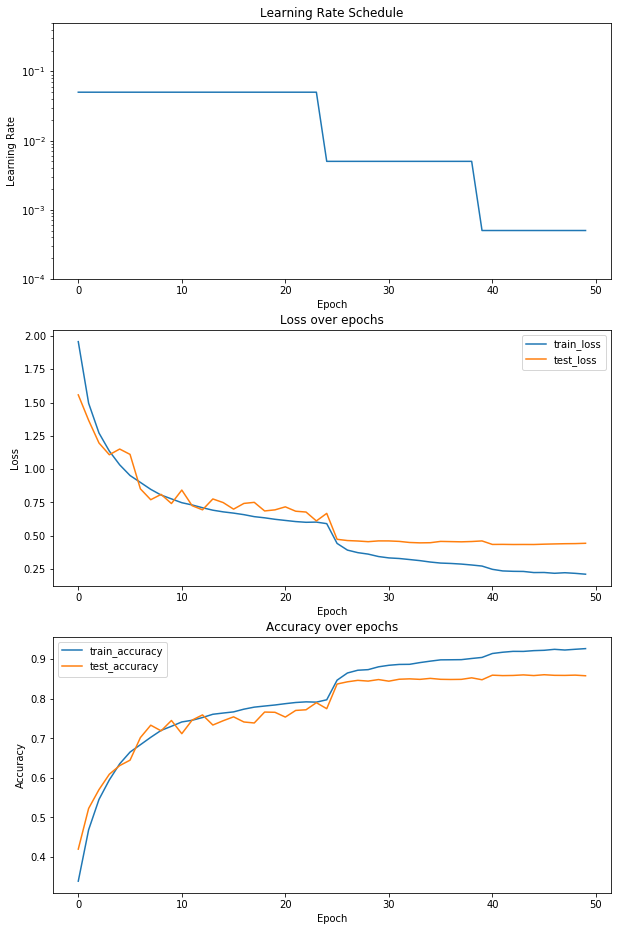

In [11]:
checkpoint = torch.load(model_dir)
r18 = torchvision.models.resnet18(num_classes=10)
r18.to(device)
r18.load_state_dict(checkpoint['model_state_dict'])
evaluate(test_ds, r18, torch.nn.CrossEntropyLoss())
plot_history(checkpoint['history'])

In [13]:
model = torchvision.models.resnet18(num_classes=10)
optimizer = torch.optim.Adam(model.parameters(), weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[25, 40], gamma=0.1)
history = train(train_ds, test_ds, optimizer, model, scheduler=scheduler, epochs=HPS['epochs'])

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0: Loss: 1.5479586157957306 Batch Accuracy: 0.43486


  2%|▏         | 1/50 [00:39<32:19, 39.58s/it]

Test Set evaluation: Loss: 1.2976331122313873 Test Accuracy: 0.5307
Epoch 1: Loss: 1.1952568571585829 Batch Accuracy: 0.57096


  4%|▍         | 2/50 [01:19<31:37, 39.54s/it]

Test Set evaluation: Loss: 1.169328428521941 Test Accuracy: 0.5978
Epoch 2: Loss: 1.0421223626722156 Batch Accuracy: 0.63158


  6%|▌         | 3/50 [01:58<30:59, 39.57s/it]

Test Set evaluation: Loss: 0.9974401895003983 Test Accuracy: 0.6584
Epoch 3: Loss: 0.9522999622632781 Batch Accuracy: 0.6651


  8%|▊         | 4/50 [02:37<30:14, 39.45s/it]

Test Set evaluation: Loss: 0.9051641301263736 Test Accuracy: 0.6805
Epoch 4: Loss: 0.8757395369317525 Batch Accuracy: 0.69482


 10%|█         | 5/50 [03:17<29:32, 39.40s/it]

Test Set evaluation: Loss: 0.8331888212433344 Test Accuracy: 0.7101
Epoch 5: Loss: 0.8312479823141756 Batch Accuracy: 0.7102


 12%|█▏        | 6/50 [03:56<28:55, 39.45s/it]

Test Set evaluation: Loss: 0.8124260849590543 Test Accuracy: 0.7191
Epoch 6: Loss: 0.7849637033689357 Batch Accuracy: 0.72912


 14%|█▍        | 7/50 [04:35<28:12, 39.35s/it]

Test Set evaluation: Loss: 0.8046313478976865 Test Accuracy: 0.7235
Epoch 7: Loss: 0.7570564566975664 Batch Accuracy: 0.7412


 16%|█▌        | 8/50 [05:15<27:42, 39.59s/it]

Test Set evaluation: Loss: 0.7090782432616511 Test Accuracy: 0.7483
Epoch 8: Loss: 0.7275547856260138 Batch Accuracy: 0.7486


 18%|█▊        | 9/50 [05:55<26:57, 39.45s/it]

Test Set evaluation: Loss: 0.7806681187092503 Test Accuracy: 0.7351
Epoch 9: Loss: 0.7030770143736964 Batch Accuracy: 0.75748


 20%|██        | 10/50 [06:34<26:14, 39.35s/it]

Test Set evaluation: Loss: 0.682557682070551 Test Accuracy: 0.7673
Epoch 10: Loss: 0.6741748251725951 Batch Accuracy: 0.7674


 22%|██▏       | 11/50 [07:14<25:41, 39.52s/it]

Test Set evaluation: Loss: 0.6660916812812225 Test Accuracy: 0.7745
Epoch 11: Loss: 0.6602622961144313 Batch Accuracy: 0.77482


 24%|██▍       | 12/50 [07:53<24:58, 39.43s/it]

Test Set evaluation: Loss: 0.6357556340060656 Test Accuracy: 0.7802
Epoch 12: Loss: 0.6449236530629571 Batch Accuracy: 0.78064


 26%|██▌       | 13/50 [08:32<24:21, 39.50s/it]

Test Set evaluation: Loss: 0.6405999649174606 Test Accuracy: 0.7778
Epoch 13: Loss: 0.6248488306541882 Batch Accuracy: 0.78716


 28%|██▊       | 14/50 [09:08<22:56, 38.24s/it]

Test Set evaluation: Loss: 0.6353016473069976 Test Accuracy: 0.7869
Epoch 14: Loss: 0.6145276139154459 Batch Accuracy: 0.7923


 30%|███       | 15/50 [09:36<20:35, 35.29s/it]

Test Set evaluation: Loss: 0.6822277616850937 Test Accuracy: 0.7657
Epoch 15: Loss: 0.5911850971943887 Batch Accuracy: 0.79688


 32%|███▏      | 16/50 [10:02<18:28, 32.59s/it]

Test Set evaluation: Loss: 0.6502513749689995 Test Accuracy: 0.7793
Epoch 16: Loss: 0.5847321010916434 Batch Accuracy: 0.80092


 34%|███▍      | 17/50 [10:29<16:57, 30.83s/it]

Test Set evaluation: Loss: 0.6708949668497979 Test Accuracy: 0.7733
Epoch 17: Loss: 0.575224866190225 Batch Accuracy: 0.80188


 36%|███▌      | 18/50 [10:56<15:47, 29.59s/it]

Test Set evaluation: Loss: 0.6055405041839503 Test Accuracy: 0.7951
Epoch 18: Loss: 0.563845853137848 Batch Accuracy: 0.80752


 38%|███▊      | 19/50 [11:22<14:46, 28.60s/it]

Test Set evaluation: Loss: 0.621255699215056 Test Accuracy: 0.787
Epoch 19: Loss: 0.5543150226478382 Batch Accuracy: 0.8105


 40%|████      | 20/50 [11:49<13:58, 27.94s/it]

Test Set evaluation: Loss: 0.6254566866385786 Test Accuracy: 0.7868
Epoch 20: Loss: 0.5509057103672905 Batch Accuracy: 0.81204


 42%|████▏     | 21/50 [12:15<13:16, 27.47s/it]

Test Set evaluation: Loss: 0.5991196530529216 Test Accuracy: 0.7972
Epoch 21: Loss: 0.5390915520813154 Batch Accuracy: 0.8159


 44%|████▍     | 22/50 [12:41<12:39, 27.13s/it]

Test Set evaluation: Loss: 0.589424300797378 Test Accuracy: 0.8047
Epoch 22: Loss: 0.5310978313236285 Batch Accuracy: 0.81882


 46%|████▌     | 23/50 [13:11<12:35, 27.97s/it]

Test Set evaluation: Loss: 0.5934963645059851 Test Accuracy: 0.799
Epoch 23: Loss: 0.5276724079533306 Batch Accuracy: 0.82012


 48%|████▊     | 24/50 [13:50<13:34, 31.31s/it]

Test Set evaluation: Loss: 0.6216436545305615 Test Accuracy: 0.7931
Epoch 24: Loss: 0.5214827403692943 Batch Accuracy: 0.82254


 50%|█████     | 25/50 [14:30<14:03, 33.73s/it]

Test Set evaluation: Loss: 0.6070965502081038 Test Accuracy: 0.795
Epoch 25: Loss: 0.41175448860201386 Batch Accuracy: 0.85976


 52%|█████▏    | 26/50 [15:09<14:10, 35.45s/it]

Test Set evaluation: Loss: 0.4508693874636783 Test Accuracy: 0.8453
Epoch 26: Loss: 0.37217220667835393 Batch Accuracy: 0.87268


 54%|█████▍    | 27/50 [15:49<14:04, 36.74s/it]

Test Set evaluation: Loss: 0.441286446927469 Test Accuracy: 0.8499
Epoch 27: Loss: 0.35251551805554754 Batch Accuracy: 0.88036


 56%|█████▌    | 28/50 [16:28<13:45, 37.53s/it]

Test Set evaluation: Loss: 0.4406484295673008 Test Accuracy: 0.852
Epoch 28: Loss: 0.3448143236320037 Batch Accuracy: 0.8831


 58%|█████▊    | 29/50 [17:09<13:24, 38.33s/it]

Test Set evaluation: Loss: 0.43006062168109266 Test Accuracy: 0.8558
Epoch 29: Loss: 0.33331751274635724 Batch Accuracy: 0.88706


 60%|██████    | 30/50 [17:48<12:53, 38.65s/it]

Test Set evaluation: Loss: 0.4352741656424124 Test Accuracy: 0.8546
Epoch 30: Loss: 0.3284773420723503 Batch Accuracy: 0.88698


 62%|██████▏   | 31/50 [18:27<12:19, 38.91s/it]

Test Set evaluation: Loss: 0.43106432428842856 Test Accuracy: 0.8543
Epoch 31: Loss: 0.31839932729978393 Batch Accuracy: 0.89004


 64%|██████▍   | 32/50 [19:08<11:47, 39.32s/it]

Test Set evaluation: Loss: 0.4295950415013712 Test Accuracy: 0.857
Epoch 32: Loss: 0.30933030044941034 Batch Accuracy: 0.89472


 66%|██████▌   | 33/50 [19:47<11:08, 39.32s/it]

Test Set evaluation: Loss: 0.42621537231946294 Test Accuracy: 0.8583
Epoch 33: Loss: 0.30354029711936137 Batch Accuracy: 0.89666


 68%|██████▊   | 34/50 [20:27<10:32, 39.53s/it]

Test Set evaluation: Loss: 0.42538917253289044 Test Accuracy: 0.859
Epoch 34: Loss: 0.2983300552496215 Batch Accuracy: 0.89794


 70%|███████   | 35/50 [21:06<09:51, 39.45s/it]

Test Set evaluation: Loss: 0.4313010248956801 Test Accuracy: 0.8567
Epoch 35: Loss: 0.29238440275497146 Batch Accuracy: 0.89972


 72%|███████▏  | 36/50 [21:46<09:12, 39.47s/it]

Test Set evaluation: Loss: 0.4278717980354647 Test Accuracy: 0.8584
Epoch 36: Loss: 0.2864076176567761 Batch Accuracy: 0.9007


 74%|███████▍  | 37/50 [22:26<08:34, 39.60s/it]

Test Set evaluation: Loss: 0.4300892932128303 Test Accuracy: 0.8617
Epoch 37: Loss: 0.28285970491216617 Batch Accuracy: 0.90244


 76%|███████▌  | 38/50 [23:05<07:55, 39.59s/it]

Test Set evaluation: Loss: 0.42903987836988666 Test Accuracy: 0.8596
Epoch 38: Loss: 0.27434885970619327 Batch Accuracy: 0.90588


 78%|███████▊  | 39/50 [23:45<07:16, 39.64s/it]

Test Set evaluation: Loss: 0.43024472213244136 Test Accuracy: 0.8592
Epoch 39: Loss: 0.2717000451081854 Batch Accuracy: 0.90674


 80%|████████  | 40/50 [24:24<06:35, 39.58s/it]

Test Set evaluation: Loss: 0.43717356874972957 Test Accuracy: 0.8596
Epoch 40: Loss: 0.25815509631277045 Batch Accuracy: 0.91148


 82%|████████▏ | 41/50 [25:04<05:55, 39.48s/it]

Test Set evaluation: Loss: 0.425867385502103 Test Accuracy: 0.8623
Epoch 41: Loss: 0.2576278533091021 Batch Accuracy: 0.91214


 84%|████████▍ | 42/50 [25:43<05:16, 39.57s/it]

Test Set evaluation: Loss: 0.4225300292048273 Test Accuracy: 0.8624
Epoch 42: Loss: 0.24732715865154095 Batch Accuracy: 0.9158


 86%|████████▌ | 43/50 [26:23<04:36, 39.50s/it]

Test Set evaluation: Loss: 0.4222858808463133 Test Accuracy: 0.8637
Epoch 43: Loss: 0.24966649585367773 Batch Accuracy: 0.91276


 88%|████████▊ | 44/50 [27:03<03:57, 39.61s/it]

Test Set evaluation: Loss: 0.4224338548470147 Test Accuracy: 0.8628
Epoch 44: Loss: 0.24536454079248715 Batch Accuracy: 0.9162


 90%|█████████ | 45/50 [27:42<03:17, 39.51s/it]

Test Set evaluation: Loss: 0.4234559054993376 Test Accuracy: 0.8627
Epoch 45: Loss: 0.24321985334310386 Batch Accuracy: 0.91674


 92%|█████████▏| 46/50 [28:22<02:38, 39.53s/it]

Test Set evaluation: Loss: 0.42139981215513206 Test Accuracy: 0.8629
Epoch 46: Loss: 0.24453265309486244 Batch Accuracy: 0.9162


 94%|█████████▍| 47/50 [29:01<01:58, 39.62s/it]

Test Set evaluation: Loss: 0.4207908935561965 Test Accuracy: 0.8647
Epoch 47: Loss: 0.24024748895555506 Batch Accuracy: 0.91768


 96%|█████████▌| 48/50 [29:41<01:19, 39.51s/it]

Test Set evaluation: Loss: 0.4202570941629289 Test Accuracy: 0.8636
Epoch 48: Loss: 0.24342643991684365 Batch Accuracy: 0.91732


 98%|█████████▊| 49/50 [30:20<00:39, 39.58s/it]

Test Set evaluation: Loss: 0.4222997617495211 Test Accuracy: 0.8639
Epoch 49: Loss: 0.24108551478828005 Batch Accuracy: 0.91846


100%|██████████| 50/50 [31:00<00:00, 37.20s/it]

Test Set evaluation: Loss: 0.4239068446280081 Test Accuracy: 0.863


In [ ]:
model